# contents
#### 1.Required imports for MNE
#### 2.Read data from set file and resample
#### 3.Segment data into real ,fake,realfake concatenation
#### 4.Time plots of epochs 
#### 5.Time-frequencey plots after filtering for each  band(delta theta alpha beta)
#### 6.repeated for each signature and mixture of signature
#### 7.PSD for each and and each signature
#### 8. topomaps 


In [1]:
import os
import numpy as np
import pandas as pd
import mne
import os.path as op
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch

from mne.datasets import somato
%matplotlib inline
import matplotlib.pyplot as plt

Extracting parameters from C:\Users\ABC\Epoch_event_data_3sec_slide sampling rate 200.set...
Not setting metadata
Not setting metadata
132 matching events found
No baseline correction applied
0 projection items activated
Ready.


<ipython-input-59-9180edf4fd7a>:11: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epoch = mne.read_epochs_eeglab(sample_data_raw_file)


<EpochsEEGLAB |  132 events (all good), 0 - 2.99 sec, baseline off, ~2.4 MB, data loaded,
 '1': 10
 '1/2': 7
 '2': 9
 '2/3': 8
 '3': 6
 '3/4': 11
 '4': 9
 '4/5': 8
 '5': 8
 '5/6': 8
 '6': 5
 '6/7': 11
 '7': 10
 '7/8': 6
 '8': 13
 '8/1': 3>
{'1': 1, '2/3': 2, '3': 3, '4': 4, '5/6': 5, '6/7': 6, '7': 7, '8': 8, '2': 9, '3/4': 10, '4/5': 11, '5': 12, '1/2': 13, '7/8': 14, '6': 15, '8/1': 16}
    Using multitaper spectrum estimation with 7 DPSS windows


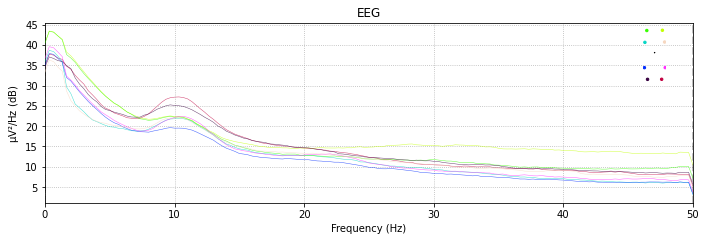

In [59]:

#reading data from .set EEGlab file
#sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file ="./Epoch_event_data_3sec_slide sampling rate 200.set"



fsampling=200



epoch = mne.read_epochs_eeglab(sample_data_raw_file)
epoch.resample(100, npad="auto")  # set sampling frequency to 100Hz
print(epoch)  # whats in epochs

print(epoch.event_id)

epoch.plot_psd();

# Segment data into real and fake signatures and plots in time

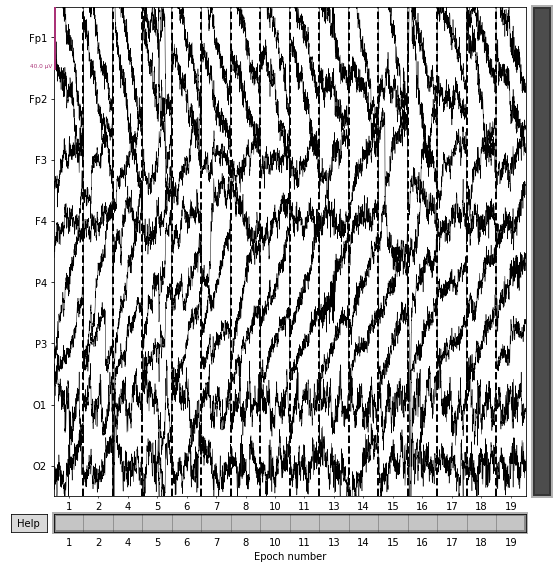

In [62]:
#epoch.plot(n_epochs=20);
# extracting  fake and  and real signatures epochs
fake_signature_epochs=epoch[1,2,4,5,6,7,8,10,11,13,14,15,16,17,18,19] #, 4 5 6 7 8 10 11 13 14 15 16 17 18 19])
real_signature_epochs=epoch[3, 9, 12, 20]
fakereal_mix=epoch[1,3,2,9,4,12] 

#ploting fake signature time signals
fake_signature_epochs.plot();



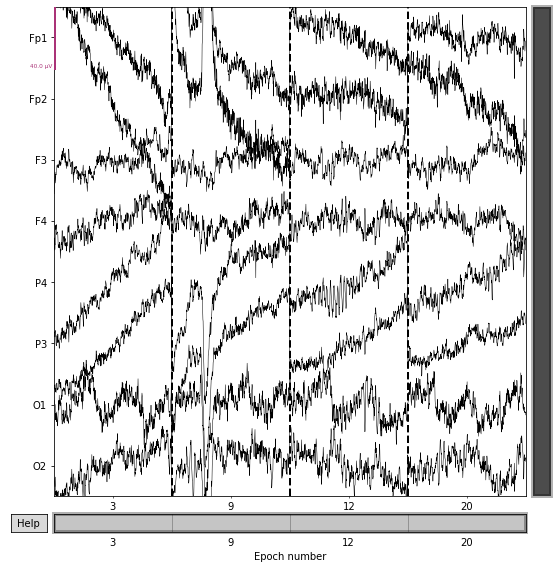

In [28]:
#ploting  real signature time signal
real_signature_epochs.plot();

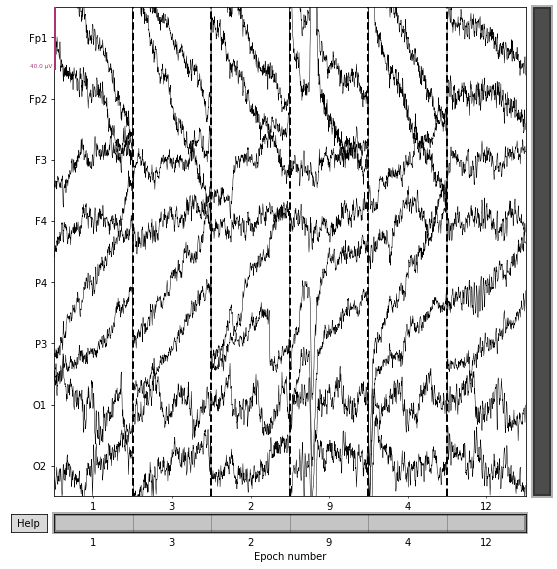

In [64]:
fakereal_mix.plot();

# Now Time frequencey plots for fake signature(different bands and all channels)

Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 661 samples (3.305 sec)

[1.         1.18920712 1.41421356 1.68179283 2.         2.37841423
 2.82842712 3.36358566 4.        ]


<ipython-input-41-a3f2d2da39d0>:3: RuntimeWarning: filter_length (661) is longer than the signal (600), distortion is likely. Reduce filter length or filter a longer signal.
  fake_signature_epochs.filter(1, 4., fir_design='firwin')


Applying baseline correction (mode: logratio)


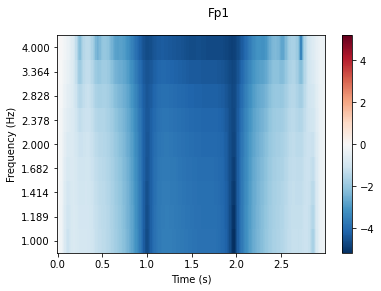

Applying baseline correction (mode: logratio)


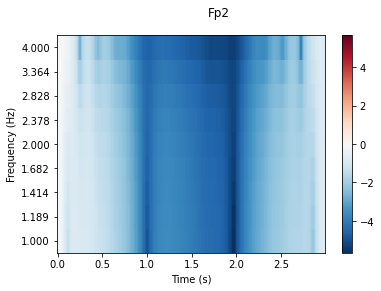

Applying baseline correction (mode: logratio)


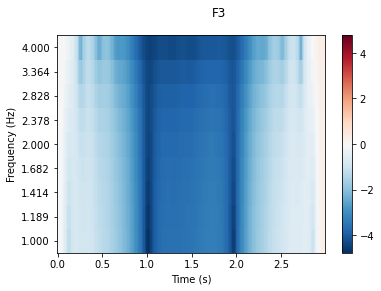

Applying baseline correction (mode: logratio)


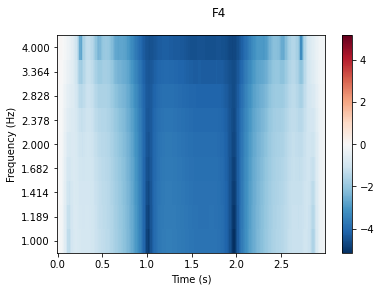

Applying baseline correction (mode: logratio)


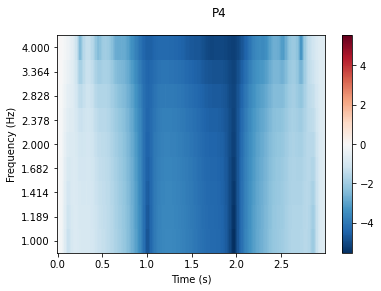

Applying baseline correction (mode: logratio)


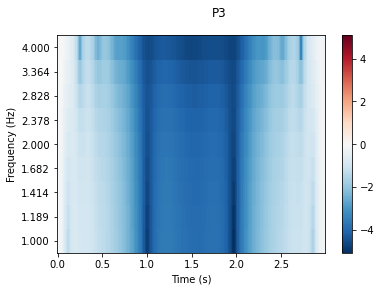

Applying baseline correction (mode: logratio)


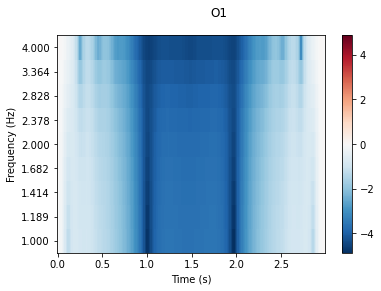

In [41]:

#  filter for  delta band fake signature(1-4)
fake_signature_epochs=epoch[1,2,4,5,6,7,8,10,11,13,14,15,16,17,18,19] #, 4 5 6 7 8 10 11 13 14 15 16 17 18 19])

fake_signature_epochs.filter(1, 4., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([1, 4]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(fake_signature_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
#power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 sec)

[4.         4.36203093 4.75682846 5.18735822 5.65685425 6.1688433
 6.72717132 7.33603235 8.        ]
Applying baseline correction (mode: logratio)


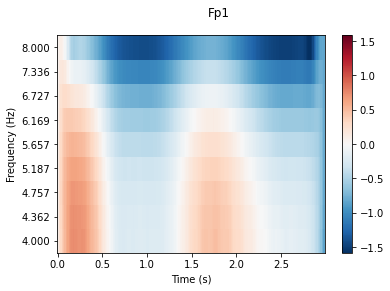

Applying baseline correction (mode: logratio)


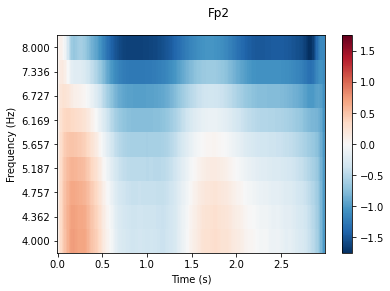

Applying baseline correction (mode: logratio)


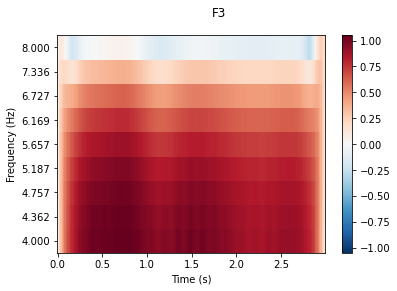

Applying baseline correction (mode: logratio)


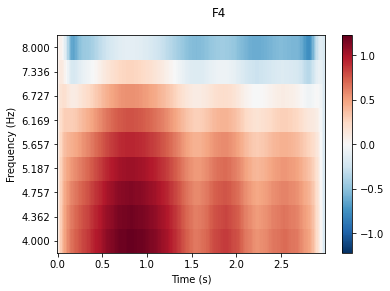

Applying baseline correction (mode: logratio)


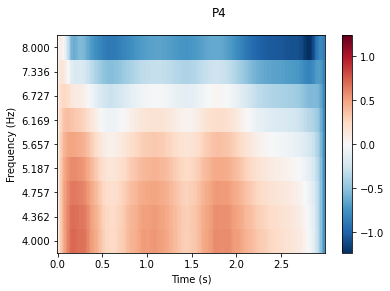

Applying baseline correction (mode: logratio)


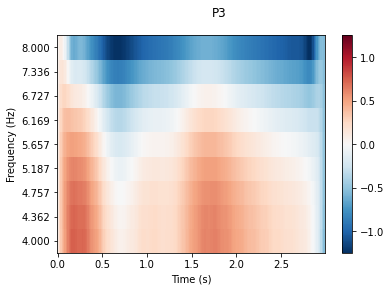

Applying baseline correction (mode: logratio)


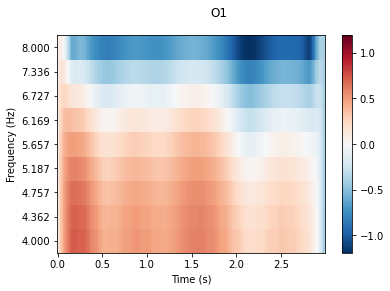

In [38]:

#  filter for  theta band fake signature(4-8)
fake_signature_epochs=epoch[1,2,4,5,6,7,8,10,11,13,14,15,16,17,18,19] #, 4 5 6 7 8 10 11 13 14 15 16 17 18 19])
fake_signature_epochs.filter(4, 8., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([4, 8]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(fake_signature_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 331 samples (1.655 sec)

[ 8.          8.41591604  8.85345536  9.31374212  9.79795897 10.30735001
 10.84322404 11.4069579  12.        ]
Applying baseline correction (mode: logratio)


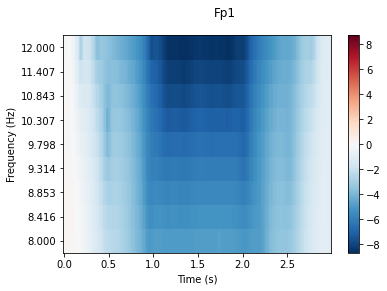

Applying baseline correction (mode: logratio)


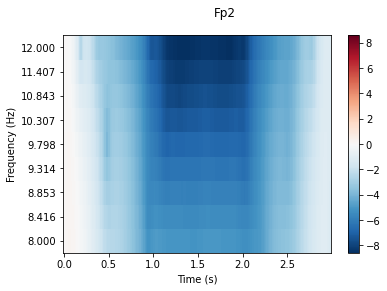

Applying baseline correction (mode: logratio)


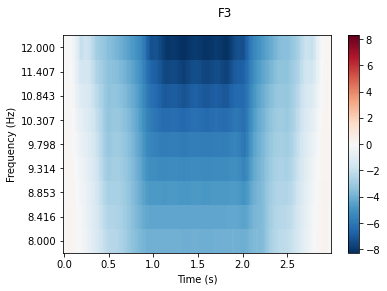

Applying baseline correction (mode: logratio)


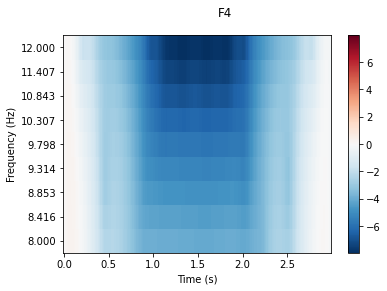

Applying baseline correction (mode: logratio)


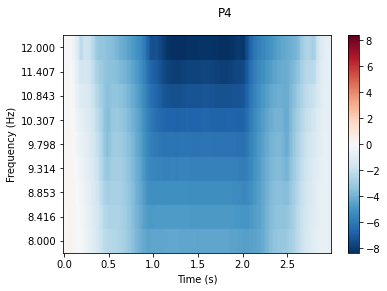

Applying baseline correction (mode: logratio)


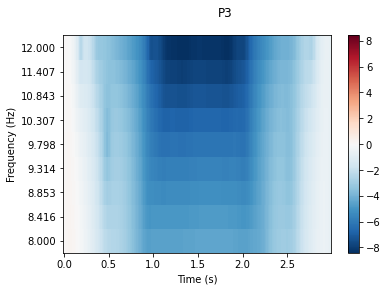

Applying baseline correction (mode: logratio)


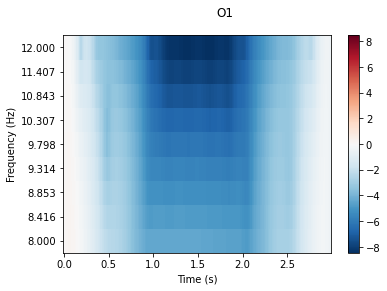

In [39]:
#  filter for  alpha band fake signature(8-12)
fake_signature_epochs=epoch[1,2,4,5,6,7,8,10,11,13,14,15,16,17,18,19] #, 4 5 6 7 8 10 11 13 14 15 16 17 18 19])
fake_signature_epochs.filter(8, 12., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([8, 12]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(fake_signature_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (1.105 sec)

[12.         12.6645418  13.36588492 14.10606736 14.88723998 15.71167276
 16.58176137 17.50003417 18.46915953 19.49195357 20.5713884  21.7106007
 22.91290084 24.18178255 25.520933   26.93424357 28.42582113 30.        ]
Applying baseline correction (mode: logratio)


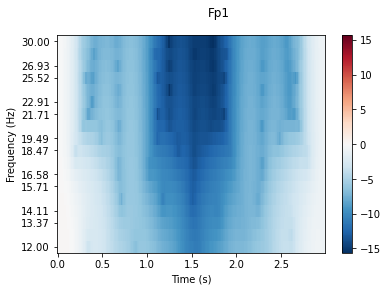

Applying baseline correction (mode: logratio)


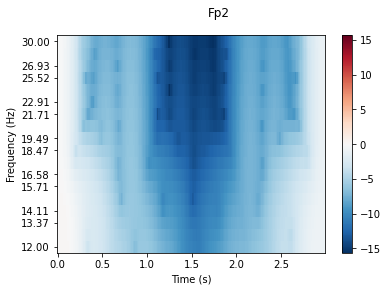

Applying baseline correction (mode: logratio)


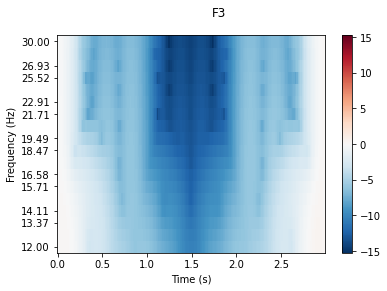

Applying baseline correction (mode: logratio)


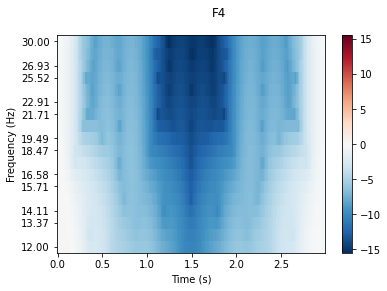

Applying baseline correction (mode: logratio)


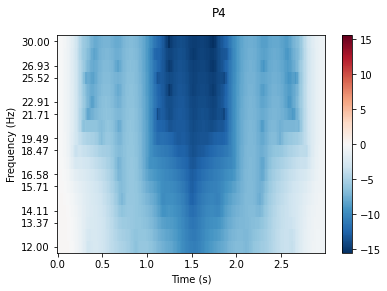

Applying baseline correction (mode: logratio)


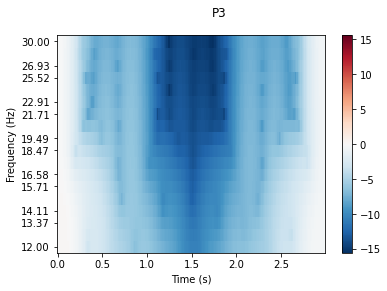

Applying baseline correction (mode: logratio)


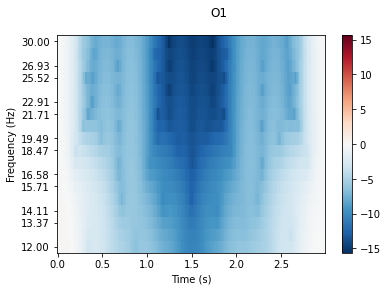

In [40]:
#  filter for  beta band fake signature(12-30)
fake_signature_epochs=epoch[1,2,4,5,6,7,8,10,11,13,14,15,16,17,18,19] #, 4 5 6 7 8 10 11 13 14 15 16 17 18 19])
fake_signature_epochs.filter(12, 30., fir_design='firwin')   #filtering

freqs = np.logspace(*np.log10([12, 30]), num=18)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(fake_signature_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

# Now Time frequencey plots for all real signature epochs (different bands and all channels)

Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 661 samples (3.305 sec)

[1.         1.18920712 1.41421356 1.68179283 2.         2.37841423
 2.82842712 3.36358566 4.        ]
Applying baseline correction (mode: logratio)


<ipython-input-50-70068ccf5d1d>:3: RuntimeWarning: filter_length (661) is longer than the signal (600), distortion is likely. Reduce filter length or filter a longer signal.
  real_signature_epochs.filter(1, 4., fir_design='firwin')


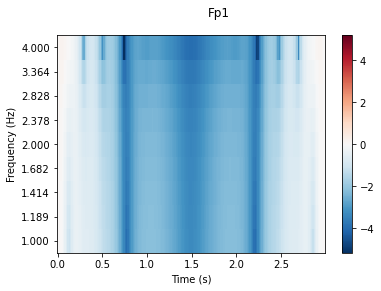

Applying baseline correction (mode: logratio)


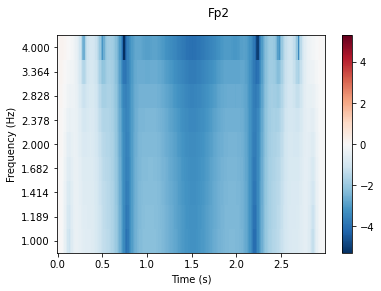

Applying baseline correction (mode: logratio)


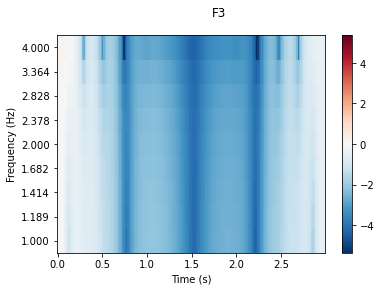

Applying baseline correction (mode: logratio)


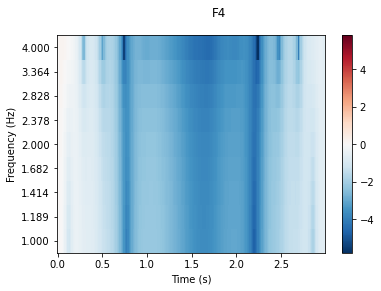

Applying baseline correction (mode: logratio)


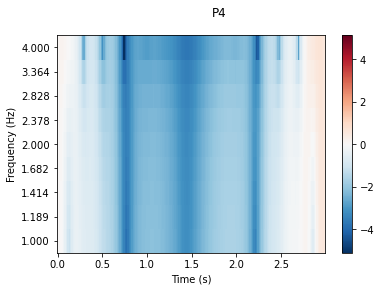

Applying baseline correction (mode: logratio)


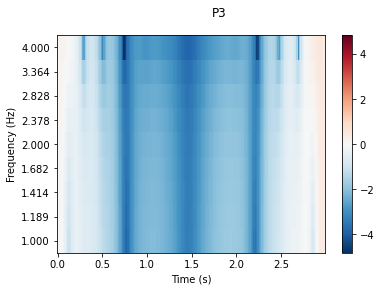

Applying baseline correction (mode: logratio)


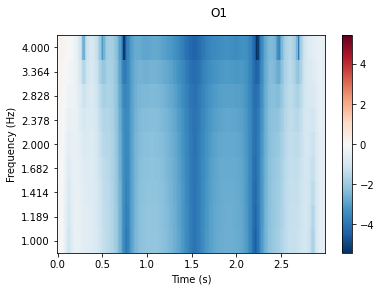

In [50]:

#  filter for  delta band real signature(1-4)
real_signature_epochs=epoch[3, 9, 12, 20]

real_signature_epochs.filter(1, 4., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([1, 4]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(real_signature_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
#power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 331 samples (1.655 sec)

[4.         4.36203093 4.75682846 5.18735822 5.65685425 6.1688433
 6.72717132 7.33603235 8.        ]
Applying baseline correction (mode: logratio)


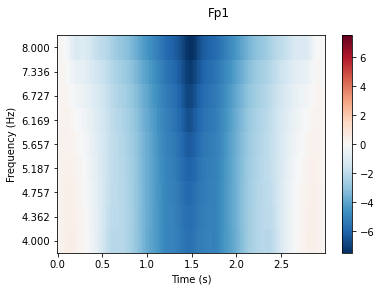

Applying baseline correction (mode: logratio)


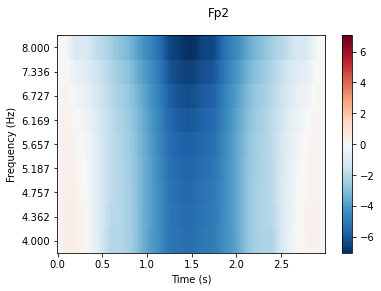

Applying baseline correction (mode: logratio)


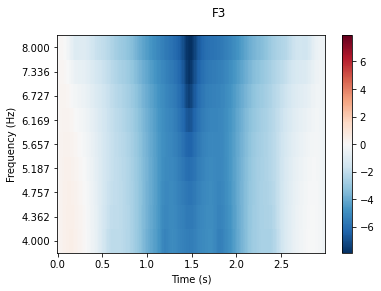

Applying baseline correction (mode: logratio)


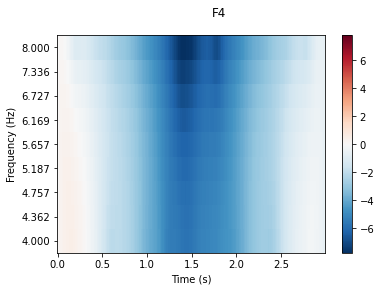

Applying baseline correction (mode: logratio)


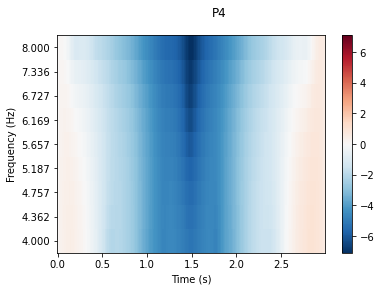

Applying baseline correction (mode: logratio)


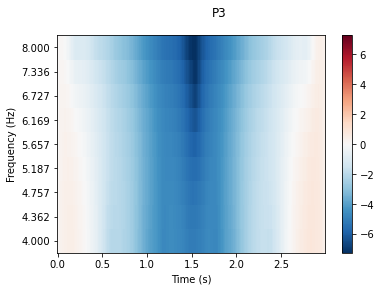

Applying baseline correction (mode: logratio)


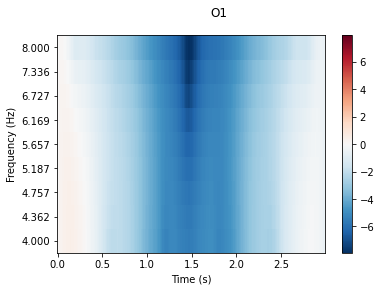

In [51]:

#  filter for  theta band real signature(4-8)
real_signature_epochs=epoch[3, 9, 12, 20]

real_signature_epochs.filter(4, 8., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([4, 8]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(real_signature_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 331 samples (1.655 sec)

[ 8.          8.41591604  8.85345536  9.31374212  9.79795897 10.30735001
 10.84322404 11.4069579  12.        ]
Applying baseline correction (mode: logratio)


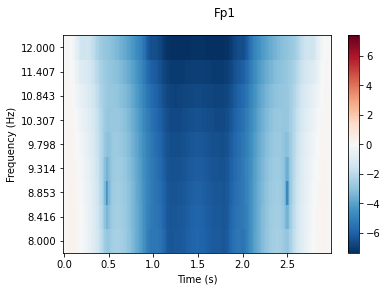

Applying baseline correction (mode: logratio)


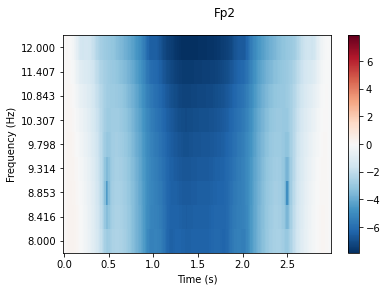

Applying baseline correction (mode: logratio)


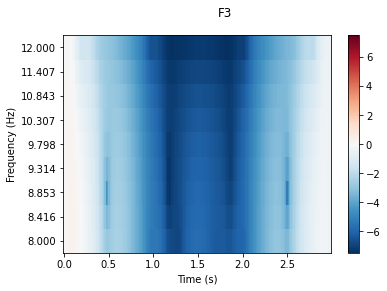

Applying baseline correction (mode: logratio)


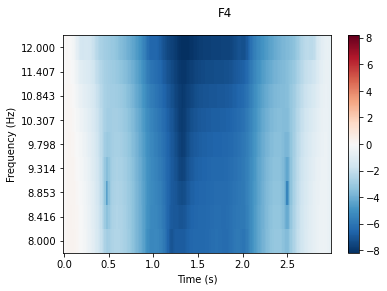

Applying baseline correction (mode: logratio)


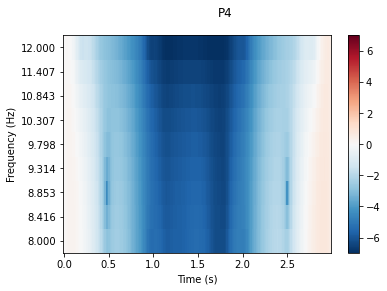

Applying baseline correction (mode: logratio)


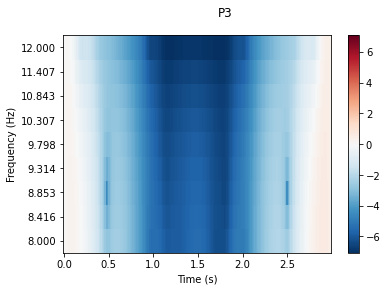

Applying baseline correction (mode: logratio)


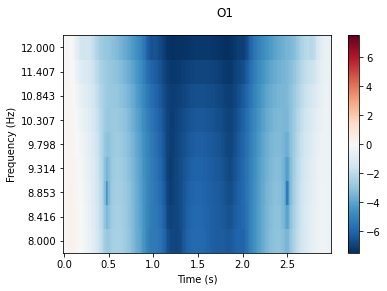

In [52]:
#  filter for  alpha band real signature(8-12)
real_signature_epochs=epoch[3, 9, 12, 20]

real_signature_epochs.filter(8, 12., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([8, 12]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(real_signature_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (1.105 sec)

[12.         12.6645418  13.36588492 14.10606736 14.88723998 15.71167276
 16.58176137 17.50003417 18.46915953 19.49195357 20.5713884  21.7106007
 22.91290084 24.18178255 25.520933   26.93424357 28.42582113 30.        ]
Applying baseline correction (mode: logratio)


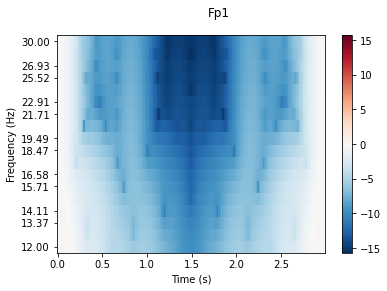

Applying baseline correction (mode: logratio)


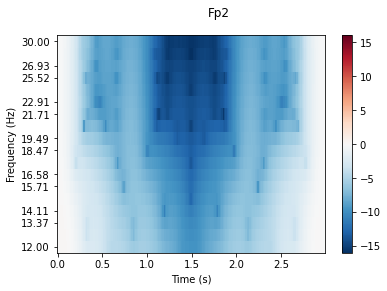

Applying baseline correction (mode: logratio)


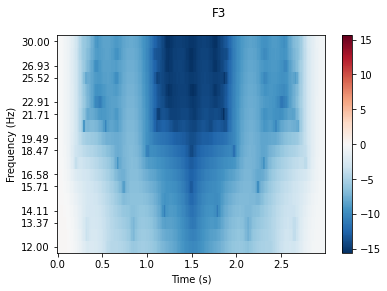

Applying baseline correction (mode: logratio)


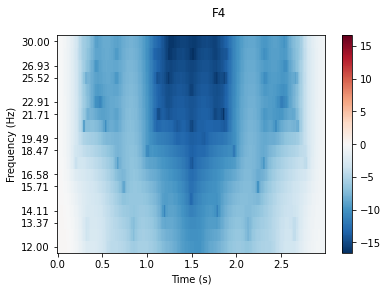

Applying baseline correction (mode: logratio)


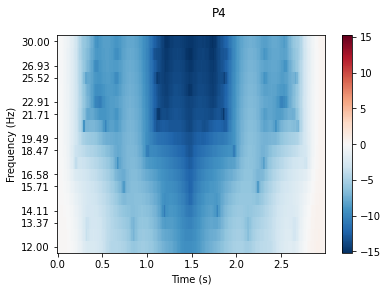

Applying baseline correction (mode: logratio)


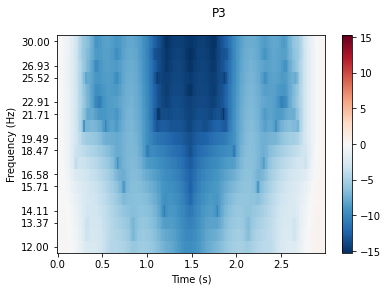

Applying baseline correction (mode: logratio)


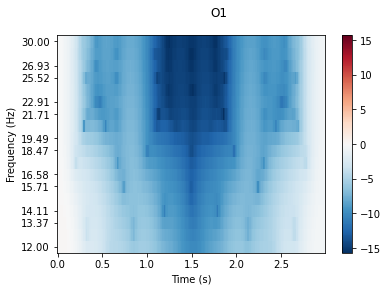

In [53]:
#  filter for  beta band real signature(12-30)
real_signature_epochs=epoch[3, 9, 12, 20]
real_signature_epochs.filter(12, 30., fir_design='firwin')#filtering


freqs = np.logspace(*np.log10([12, 30]), num=18)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(real_signature_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

# fake and real concatination

Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 331 samples (3.310 sec)

[1.         1.18920712 1.41421356 1.68179283 2.         2.37841423
 2.82842712 3.36358566 4.        ]
Applying baseline correction (mode: logratio)


<ipython-input-67-d9962d9e6412>:4: RuntimeWarning: filter_length (331) is longer than the signal (300), distortion is likely. Reduce filter length or filter a longer signal.
  fakereal_mix.filter(1, 4., fir_design='firwin')  #filtering


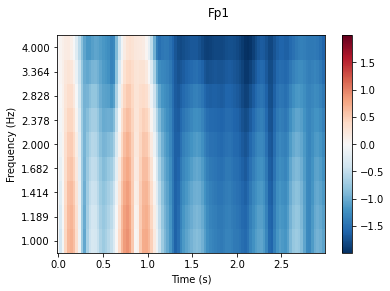

Applying baseline correction (mode: logratio)


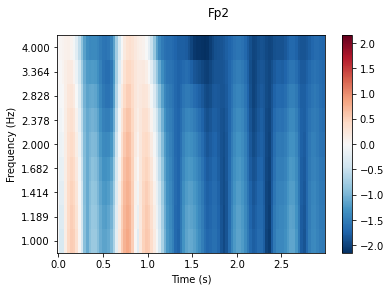

Applying baseline correction (mode: logratio)


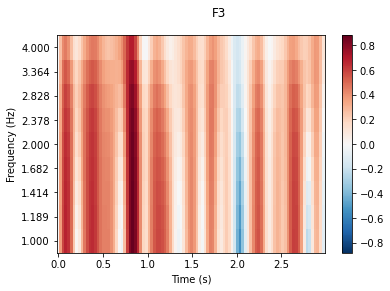

Applying baseline correction (mode: logratio)


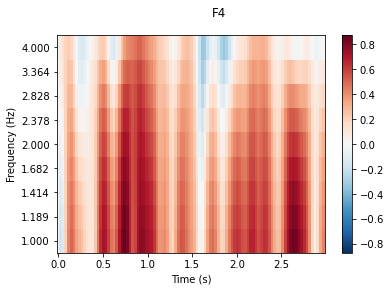

Applying baseline correction (mode: logratio)


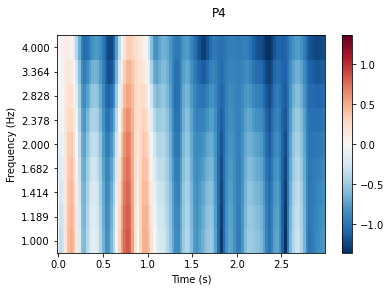

Applying baseline correction (mode: logratio)


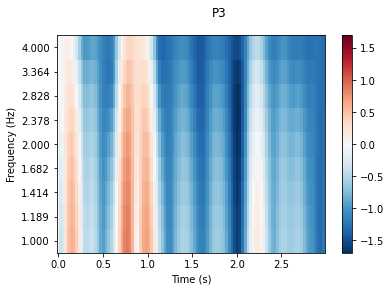

Applying baseline correction (mode: logratio)


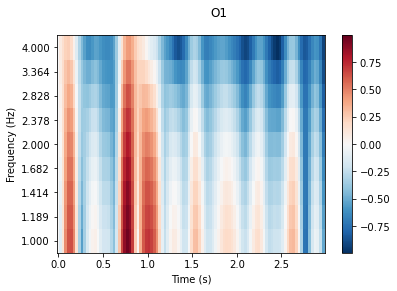

In [67]:

#  filter for  delta band fakereal_mix signature(1-4)
fakereal_mix=epoch[1,3,2,9,4,12]

fakereal_mix.filter(1, 4., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([1, 4]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(fakereal_mix, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
#power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 165 samples (1.650 sec)

[4.         4.36203093 4.75682846 5.18735822 5.65685425 6.1688433
 6.72717132 7.33603235 8.        ]
Applying baseline correction (mode: logratio)


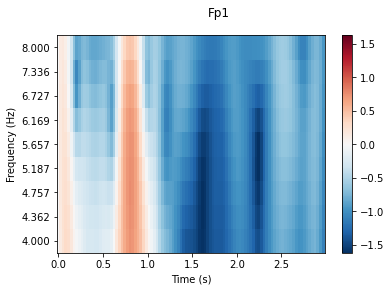

Applying baseline correction (mode: logratio)


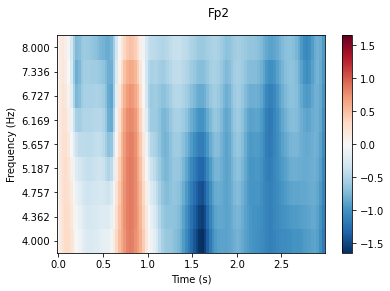

Applying baseline correction (mode: logratio)


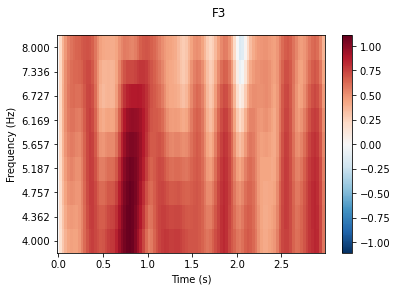

Applying baseline correction (mode: logratio)


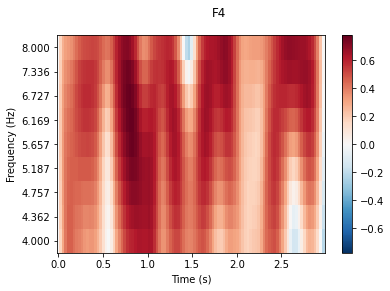

Applying baseline correction (mode: logratio)


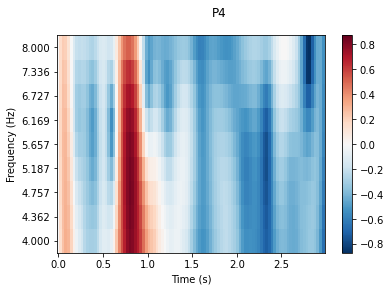

Applying baseline correction (mode: logratio)


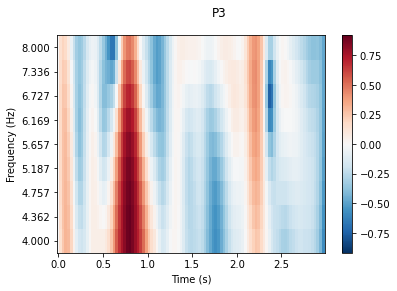

Applying baseline correction (mode: logratio)


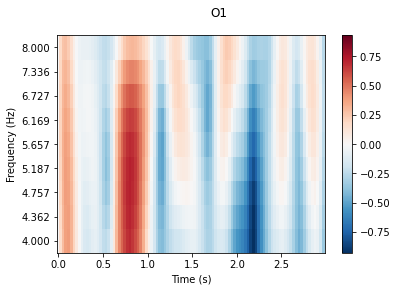

In [68]:

#  filter for  theta band fakereal_mix signature(4-8)
fakereal_mix=epoch[1,3,2,9,4,12]
fakereal_mix.filter(4, 8., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([4, 8]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(fakereal_mix, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 165 samples (1.650 sec)

[ 8.          8.41591604  8.85345536  9.31374212  9.79795897 10.30735001
 10.84322404 11.4069579  12.        ]
Applying baseline correction (mode: logratio)


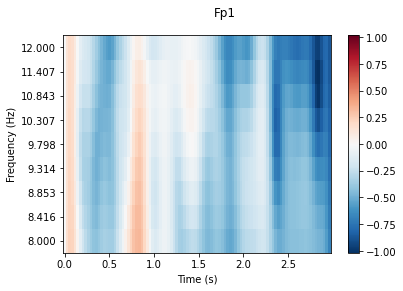

Applying baseline correction (mode: logratio)


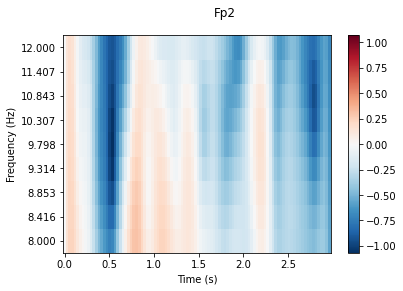

Applying baseline correction (mode: logratio)


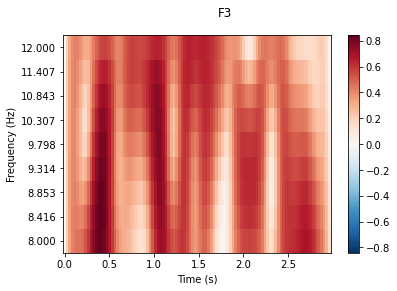

Applying baseline correction (mode: logratio)


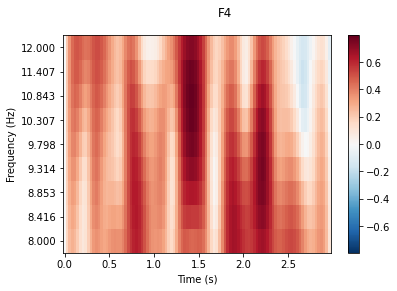

Applying baseline correction (mode: logratio)


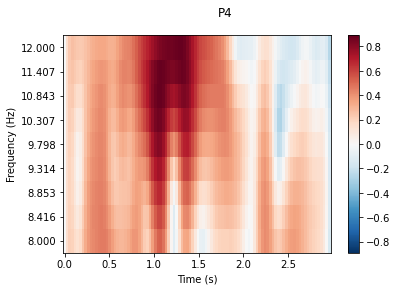

Applying baseline correction (mode: logratio)


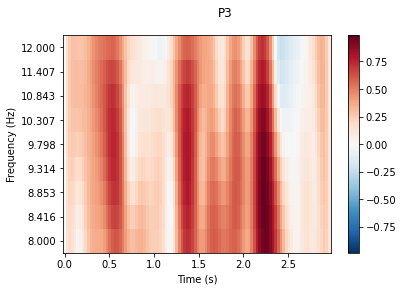

Applying baseline correction (mode: logratio)


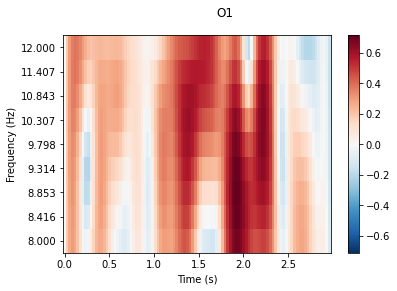

In [69]:
#  filter for  alpha band fakereal_mix signature(8-12)
fakereal_mix=epoch[1,3,2,9,4,12]
fakereal_mix.filter(8, 12., fir_design='firwin')  #filtering

freqs = np.logspace(*np.log10([8, 12]), num=9)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(fakereal_mix, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 111 samples (1.110 sec)

[12.         12.6645418  13.36588492 14.10606736 14.88723998 15.71167276
 16.58176137 17.50003417 18.46915953 19.49195357 20.5713884  21.7106007
 22.91290084 24.18178255 25.520933   26.93424357 28.42582113 30.        ]
Applying baseline correction (mode: logratio)


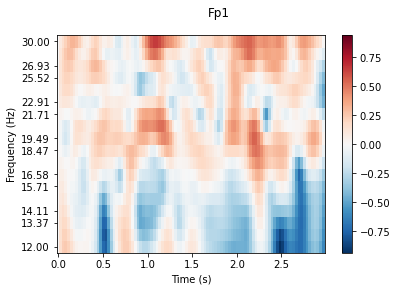

Applying baseline correction (mode: logratio)


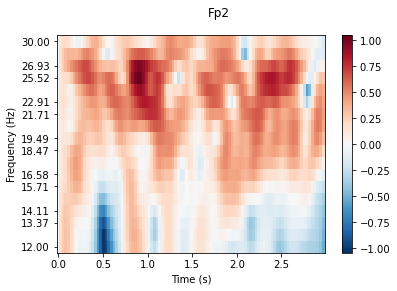

Applying baseline correction (mode: logratio)


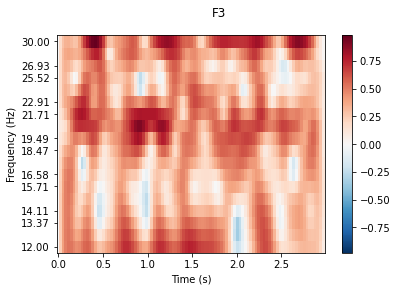

Applying baseline correction (mode: logratio)


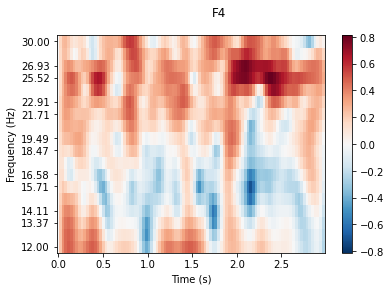

Applying baseline correction (mode: logratio)


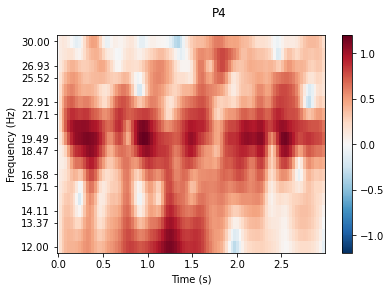

Applying baseline correction (mode: logratio)


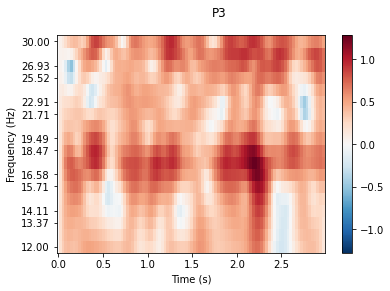

Applying baseline correction (mode: logratio)


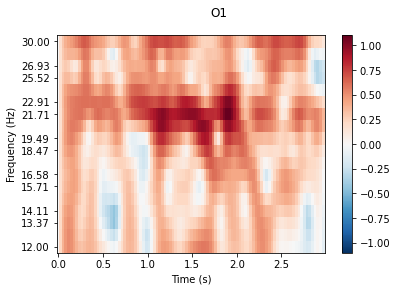

In [70]:
#  filter for  beta band fakereal_mix signature(12-30)
fakereal_mix=epoch[1,3,2,9,4,12]
fakereal_mix.filter(12, 30., fir_design='firwin')   #filtering

freqs = np.logspace(*np.log10([12, 30]), num=18)
print(freqs)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(fakereal_mix, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

#ploting time- frequence all  8 channels 
for i in range(0,7):
    power.plot([i], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[i]);

# PSD of fake signal band wise

    Using multitaper spectrum estimation with 7 DPSS windows


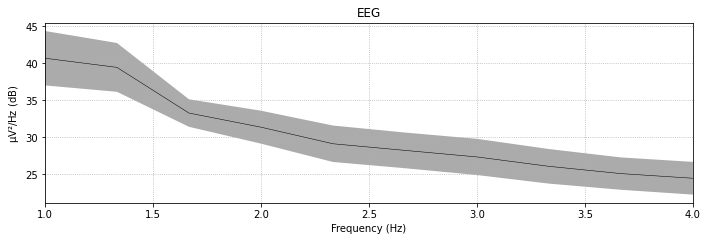

    Using multitaper spectrum estimation with 7 DPSS windows


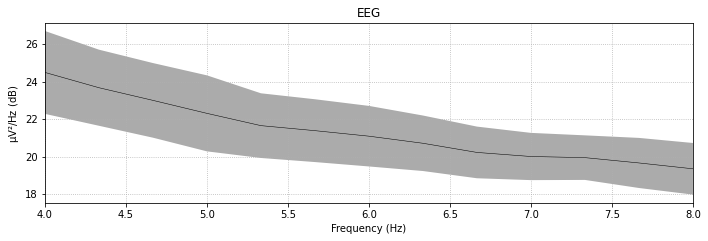

    Using multitaper spectrum estimation with 7 DPSS windows


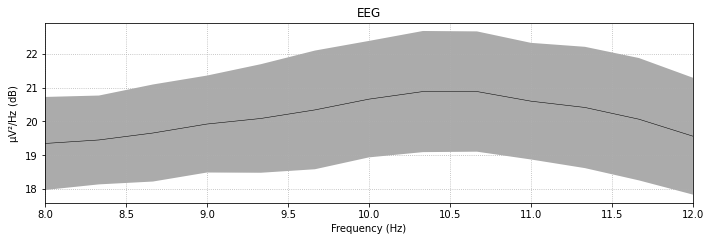

    Using multitaper spectrum estimation with 7 DPSS windows


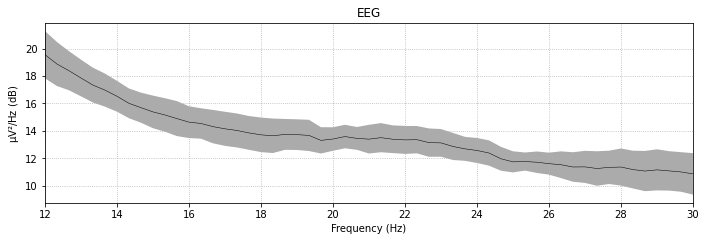

    Using multitaper spectrum estimation with 7 DPSS windows


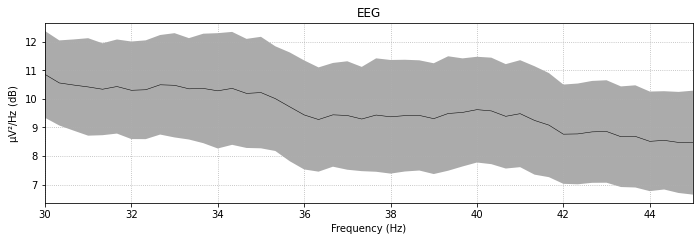

In [55]:
fake_signature_epochs=epoch[1,2,4,5,6,7,8,10,11,13,14,15,16,17,18,19] #, 4 5 6 7 8 10 11 13 14 15 16 17 18 19])

fake_signature_epochs.plot_psd(fmin=1., fmax=4., average=True, spatial_colors=False);#delta
fake_signature_epochs.plot_psd(fmin=4., fmax=8., average=True, spatial_colors=False);#theta
fake_signature_epochs.plot_psd(fmin=8., fmax=12., average=True, spatial_colors=False);#alpha
fake_signature_epochs.plot_psd(fmin=12., fmax=30., average=True, spatial_colors=False);#beta
fake_signature_epochs.plot_psd(fmin=30., fmax=45., average=True, spatial_colors=False);#gemma

# PSD of real signature band wise

    Using multitaper spectrum estimation with 7 DPSS windows


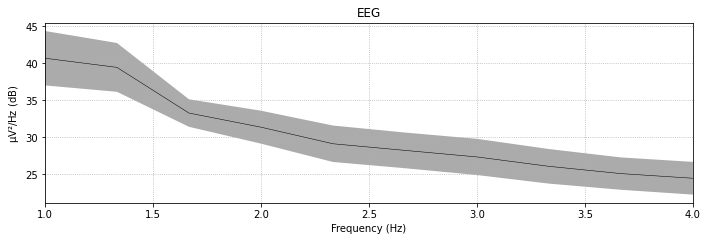

    Using multitaper spectrum estimation with 7 DPSS windows


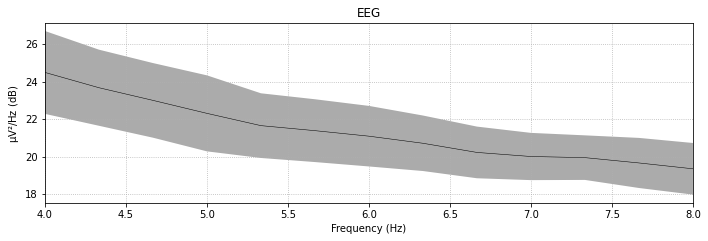

    Using multitaper spectrum estimation with 7 DPSS windows


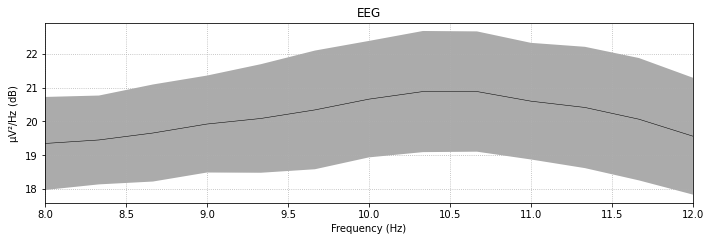

    Using multitaper spectrum estimation with 7 DPSS windows


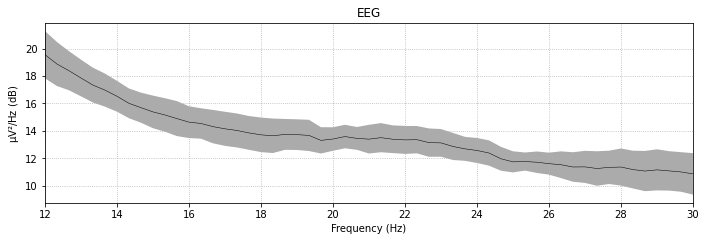

In [56]:
real_signature_epochs=epoch[3, 9, 12, 20]
real_signature_epochs.plot_psd(fmin=1., fmax=4., average=True, spatial_colors=False);#delta
real_signature_epochs.plot_psd(fmin=4., fmax=8., average=True, spatial_colors=False);#theta
real_signature_epochs.plot_psd(fmin=8., fmax=12., average=True, spatial_colors=False);#alpha
real_signature_epochs.plot_psd(fmin=12., fmax=30., average=True, spatial_colors=False);#beta
real_signature_epochs.plot_psd(fmin=30., fmax=45., average=True, spatial_colors=False);#gemma

# PSD of fakereal_mix

    Using multitaper spectrum estimation with 7 DPSS windows


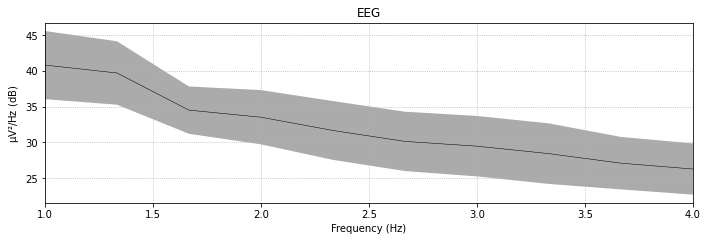

    Using multitaper spectrum estimation with 7 DPSS windows


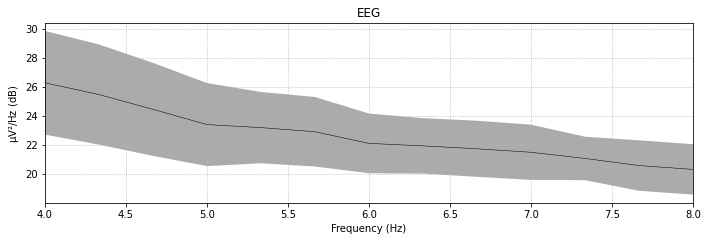

    Using multitaper spectrum estimation with 7 DPSS windows


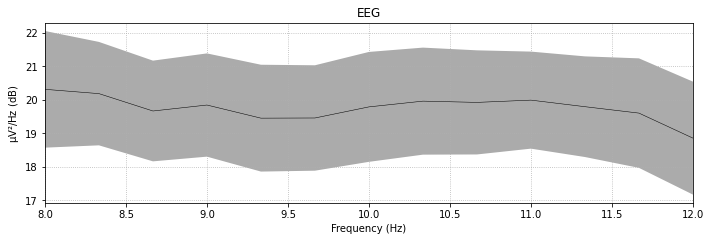

    Using multitaper spectrum estimation with 7 DPSS windows


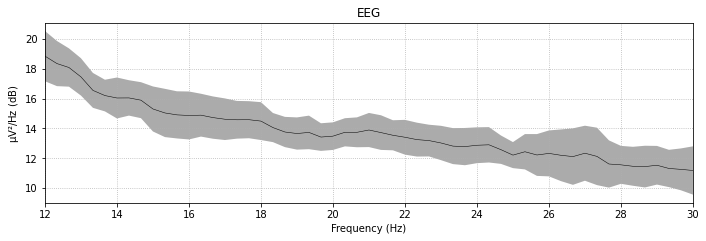

    Using multitaper spectrum estimation with 7 DPSS windows


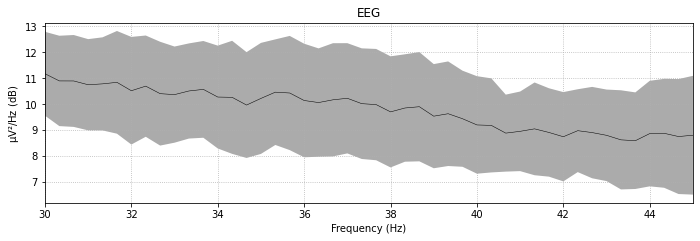

In [66]:
fakereal_mix=epoch[1,3,2,9,4,12]
fakereal_mix.plot_psd(fmin=1., fmax=4., average=True, spatial_colors=False);#delta
fakereal_mix.plot_psd(fmin=4., fmax=8., average=True, spatial_colors=False);#theta
fakereal_mix.plot_psd(fmin=8., fmax=12., average=True, spatial_colors=False);#alpha
fakereal_mix.plot_psd(fmin=12., fmax=30., average=True, spatial_colors=False);#beta
fakereal_mix.plot_psd(fmin=30., fmax=45., average=True, spatial_colors=False);#gemma

    Using multitaper spectrum estimation with 7 DPSS windows


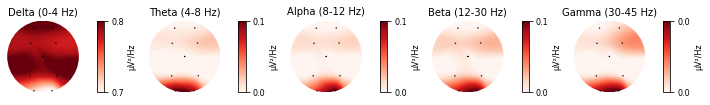

In [57]:
#fake signature topomap
fake_signature_epochs.plot_psd_topomap( normalize=True);

    Using multitaper spectrum estimation with 7 DPSS windows


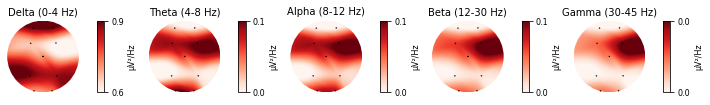

In [58]:
#real signature topomap
real_signature_epochs.plot_psd_topomap( normalize=True);


    Using multitaper spectrum estimation with 7 DPSS windows


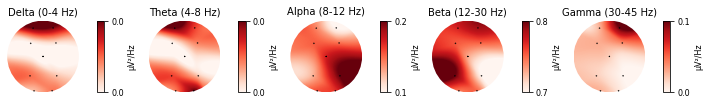

In [71]:
fakereal_mix.plot_psd_topomap( normalize=True);